# Description

This notebook contains code to reproduce Figure 4b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
from IPython.display import display
%matplotlib inline

In [12]:
Models = ['choBMP2_model.mat', 'choBMP7_model.mat', 'choEPO_model.mat', 'choETANERCEPT_model.mat', 
          'choF8_model.mat', 'choIFNB1_model.mat', 'choRITUXIMAB_model.mat', 'choTPA_model.mat']

MWs = [44702, 49313, 21307, 51234.9, 267009, 22294, 143859.7, 62917]

Text(0.5,1,'Productivity-growth trade-off (Figure 4b)')

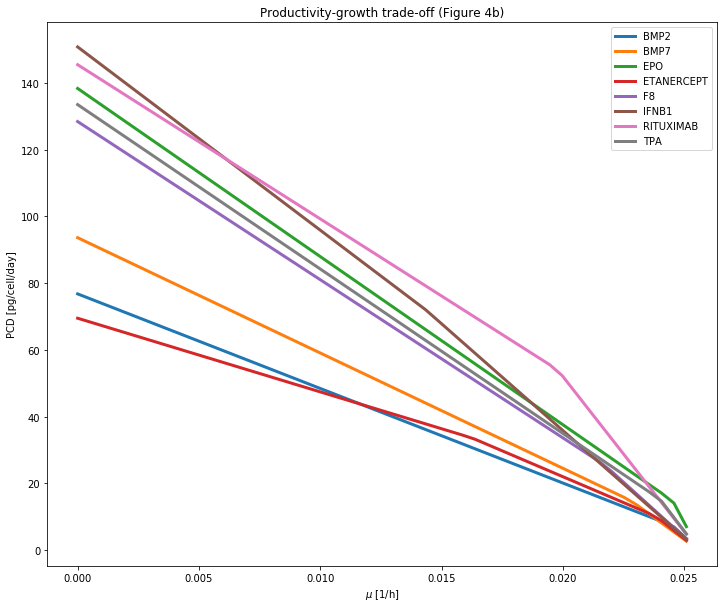

In [14]:
plt.figure(figsize=(12,10))
growths = []
qps = []
pcds = []
for i in range(len(Models)):
    model = cobra.io.load_matlab_model(Models[i])
    mw = MWs[i]
    objective_rxn = ''
    for r in model.reactions:
        if "Final_demand" in r.id:
            objective_rxn = r.id
            break
    # Plot Pareto frontier of secretion-for-growth trade-off
    model.objective = 'biomass_cho_producing'
    max_growth = model.slim_optimize()
    model.objective = objective_rxn
    steps = 50
    x = [max_growth/steps * i for i in range(steps)]
    y = [0] * len(x)
    for n in range(steps):
        mu_constraint = x[n]
        model.reactions.get_by_id('biomass_cho_producing').lower_bound = mu_constraint
        y[n] = model.slim_optimize()
    # PCD results
    y_pcd = np.array(y) * mw / 1000.0 * 456. * 24.
    growths.append(x)
    qps.append(y)
    pcds.append(y_pcd)
    plt.plot(x,y_pcd,linewidth=3,label=Models[i].replace('cho','').replace('_model.mat',''))
plt.legend()
plt.xlabel('$\mu$ [1/h]')
plt.ylabel('PCD [pg/cell/day]')
plt.title('Productivity-growth trade-off (Figure 4b)')

In [15]:
df = pd.DataFrame()
for i in range(len(Models)):
    col_name = Models[i].replace('cho','').replace('_model.mat','')
    df[col_name + "_growth"] = growths[i]
    df[col_name + "_PCD"] = pcds[i]

In [16]:
df

,BMP2_growth,BMP2_PCD,BMP7_growth,BMP7_PCD,EPO_growth,EPO_PCD,ETANERCEPT_growth,ETANERCEPT_PCD,F8_growth,F8_PCD,IFNB1_growth,IFNB1_PCD,RITUXIMAB_growth,RITUXIMAB_PCD,TPA_growth,TPA_PCD
0,0.000000,76.800415,0.000000,93.640501,0.000000,138.372811,0.000000,69.506986,0.000000,128.445988,0.000000,150.815237,0.000000,145.486563,0.000000,133.528814
1,0.000512,75.349333,0.000512,91.871239,0.000512,135.792675,0.000512,68.376518,0.000512,126.019104,0.000512,148.003097,0.000512,143.120355,0.000512,131.005895
2,0.001024,73.898251,0.001024,90.101977,0.001024,133.212540,0.001024,67.246050,0.001024,123.592220,0.001024,145.190957,0.001024,140.754148,0.001024,128.482975
3,0.001536,72.447168,0.001536,88.332715,0.001536,130.632405,0.001536,66.115581,0.001536,121.165336,0.001536,142.378817,0.001536,138.387940,0.001536,125.960055
4,0.002048,70.996086,0.002048,86.563453,0.002048,128.052269,0.002048,64.985113,0.002048,118.738453,0.002048,139.566676,0.002048,136.021733,0.002048,123.437135
5,0.002560,69.545004,0.002560,84.794191,0.002560,125.472134,0.002560,63.854645,0.002560,116.311569,0.002560,136.754536,0.002560,133.655525,0.002560,120.914215
6,0.003073,68.093922,0.003073,83.024928,0.003073,122.891998,0.003073,62.724176,0.003073,113.884685,0.003073,133.942396,0.003073,131.289318,0.003073,118.391295
7,0.003585,66.642839,0.003585,81.255666,0.003585,120.311863,0.003585,61.593708,0.003585,111.457801,0.003585,131.130256,0.003585,128.923110,0.003585,115.868375
8,0.004097,65.191757,0.004097,79.486404,0.004097,117.731728,0.004097,60.463240,0.004097,109.030917,0.004097,128.318116,0.004097,126.556903,0.004097,113.345456
9,0.004609,63.740675,0.004609,77.717142,0.004609,115.151592,0.004609,59.332771,0.004609,106.604033,0.004609,125.505976,0.004609,124.190695,0.004609,110.822536
